# Algerian_Forest_Linear_Regression_Temperature_Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv("C:\\Users\\risha\\Downloads\\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [10]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [11]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [12]:
data.shape

(246, 14)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [14]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [15]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [16]:
data.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [17]:
data.drop([122,123],inplace=True)

In [18]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [19]:
data.loc[:122,"Region"]=0
data.loc[122:,"Region"]=1

In [20]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
data.dropna(inplace=True)

In [24]:
data.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [29]:
data[['day','month','year','Temperature','RH','WS',"Region"]]=data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [30]:
data.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
Tempreture      int32
WS              int32
dtype: object

In [32]:
data.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [33]:
data.Classes = data.Classes.str.strip()
data.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [34]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'Tempreture',
       'WS'],
      dtype='object')

In [35]:
data[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=data[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [36]:
data.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws              object
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
Tempreture       int32
WS               int32
dtype: object

In [37]:
data1= data.drop(['year'],axis=1)

In [38]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,0.600823,1.915875,0.0,0.00,0.0,0.00,16.0
month,243.0,77.403292,14.370033,28.0,71.50,83.0,88.00,96.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,4.329218,4.141936,0.0,1.00,3.0,7.00,19.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0
BUI,243.0,16.690535,14.228421,1.1,6.00,12.4,22.65,68.0


In [39]:
data1['Classes']=np.where(data1['Classes']=='not fire',0,1)

In [40]:
data1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Tempreture,WS
0,0,65,29,1,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,29,18
1,1,64,29,1,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,29,13
2,13,47,26,0,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,26,22
3,2,28,25,0,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,25,13
4,0,64,27,1,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,27,16


In [41]:
data1.corr()

,day,month,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Tempreture,WS
day,1.000000,-0.496339,-0.322351,-0.294768,0.992718,-0.496880,-0.253758,-0.268523,-0.301695,-0.264794,-0.279140,-0.326876,-0.270804,-0.322351,0.170238
month,-0.496339,1.000000,0.677443,0.729235,-0.543344,0.999791,0.603774,0.507877,0.740381,0.592124,0.691713,0.768896,0.679905,0.677443,-0.166354
Temperature,-0.322351,0.677443,1.000000,0.601893,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.561140,1.000000,-0.284510
RH,-0.294768,0.729235,0.601893,1.000000,-0.340024,0.728955,0.679862,0.502839,0.997651,0.641022,0.921109,0.728555,0.918229,0.601893,0.005143
Rain,0.992718,-0.543344,-0.326492,-0.340024,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.315904,-0.326492,0.171506
FFMC,-0.496880,0.999791,0.676568,0.728955,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.679293,0.676568,-0.166548
DMC,-0.253758,0.603774,0.485687,0.679862,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.875381,0.485687,-0.000721
DC,-0.268523,0.507877,0.376284,0.502839,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,0.738619,0.376284,0.079135
ISI,-0.301695,0.740381,0.603871,0.997651,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.919770,0.603871,0.008532
BUI,-0.264794,0.592124,0.459789,0.641022,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.856843,0.459789,0.031438


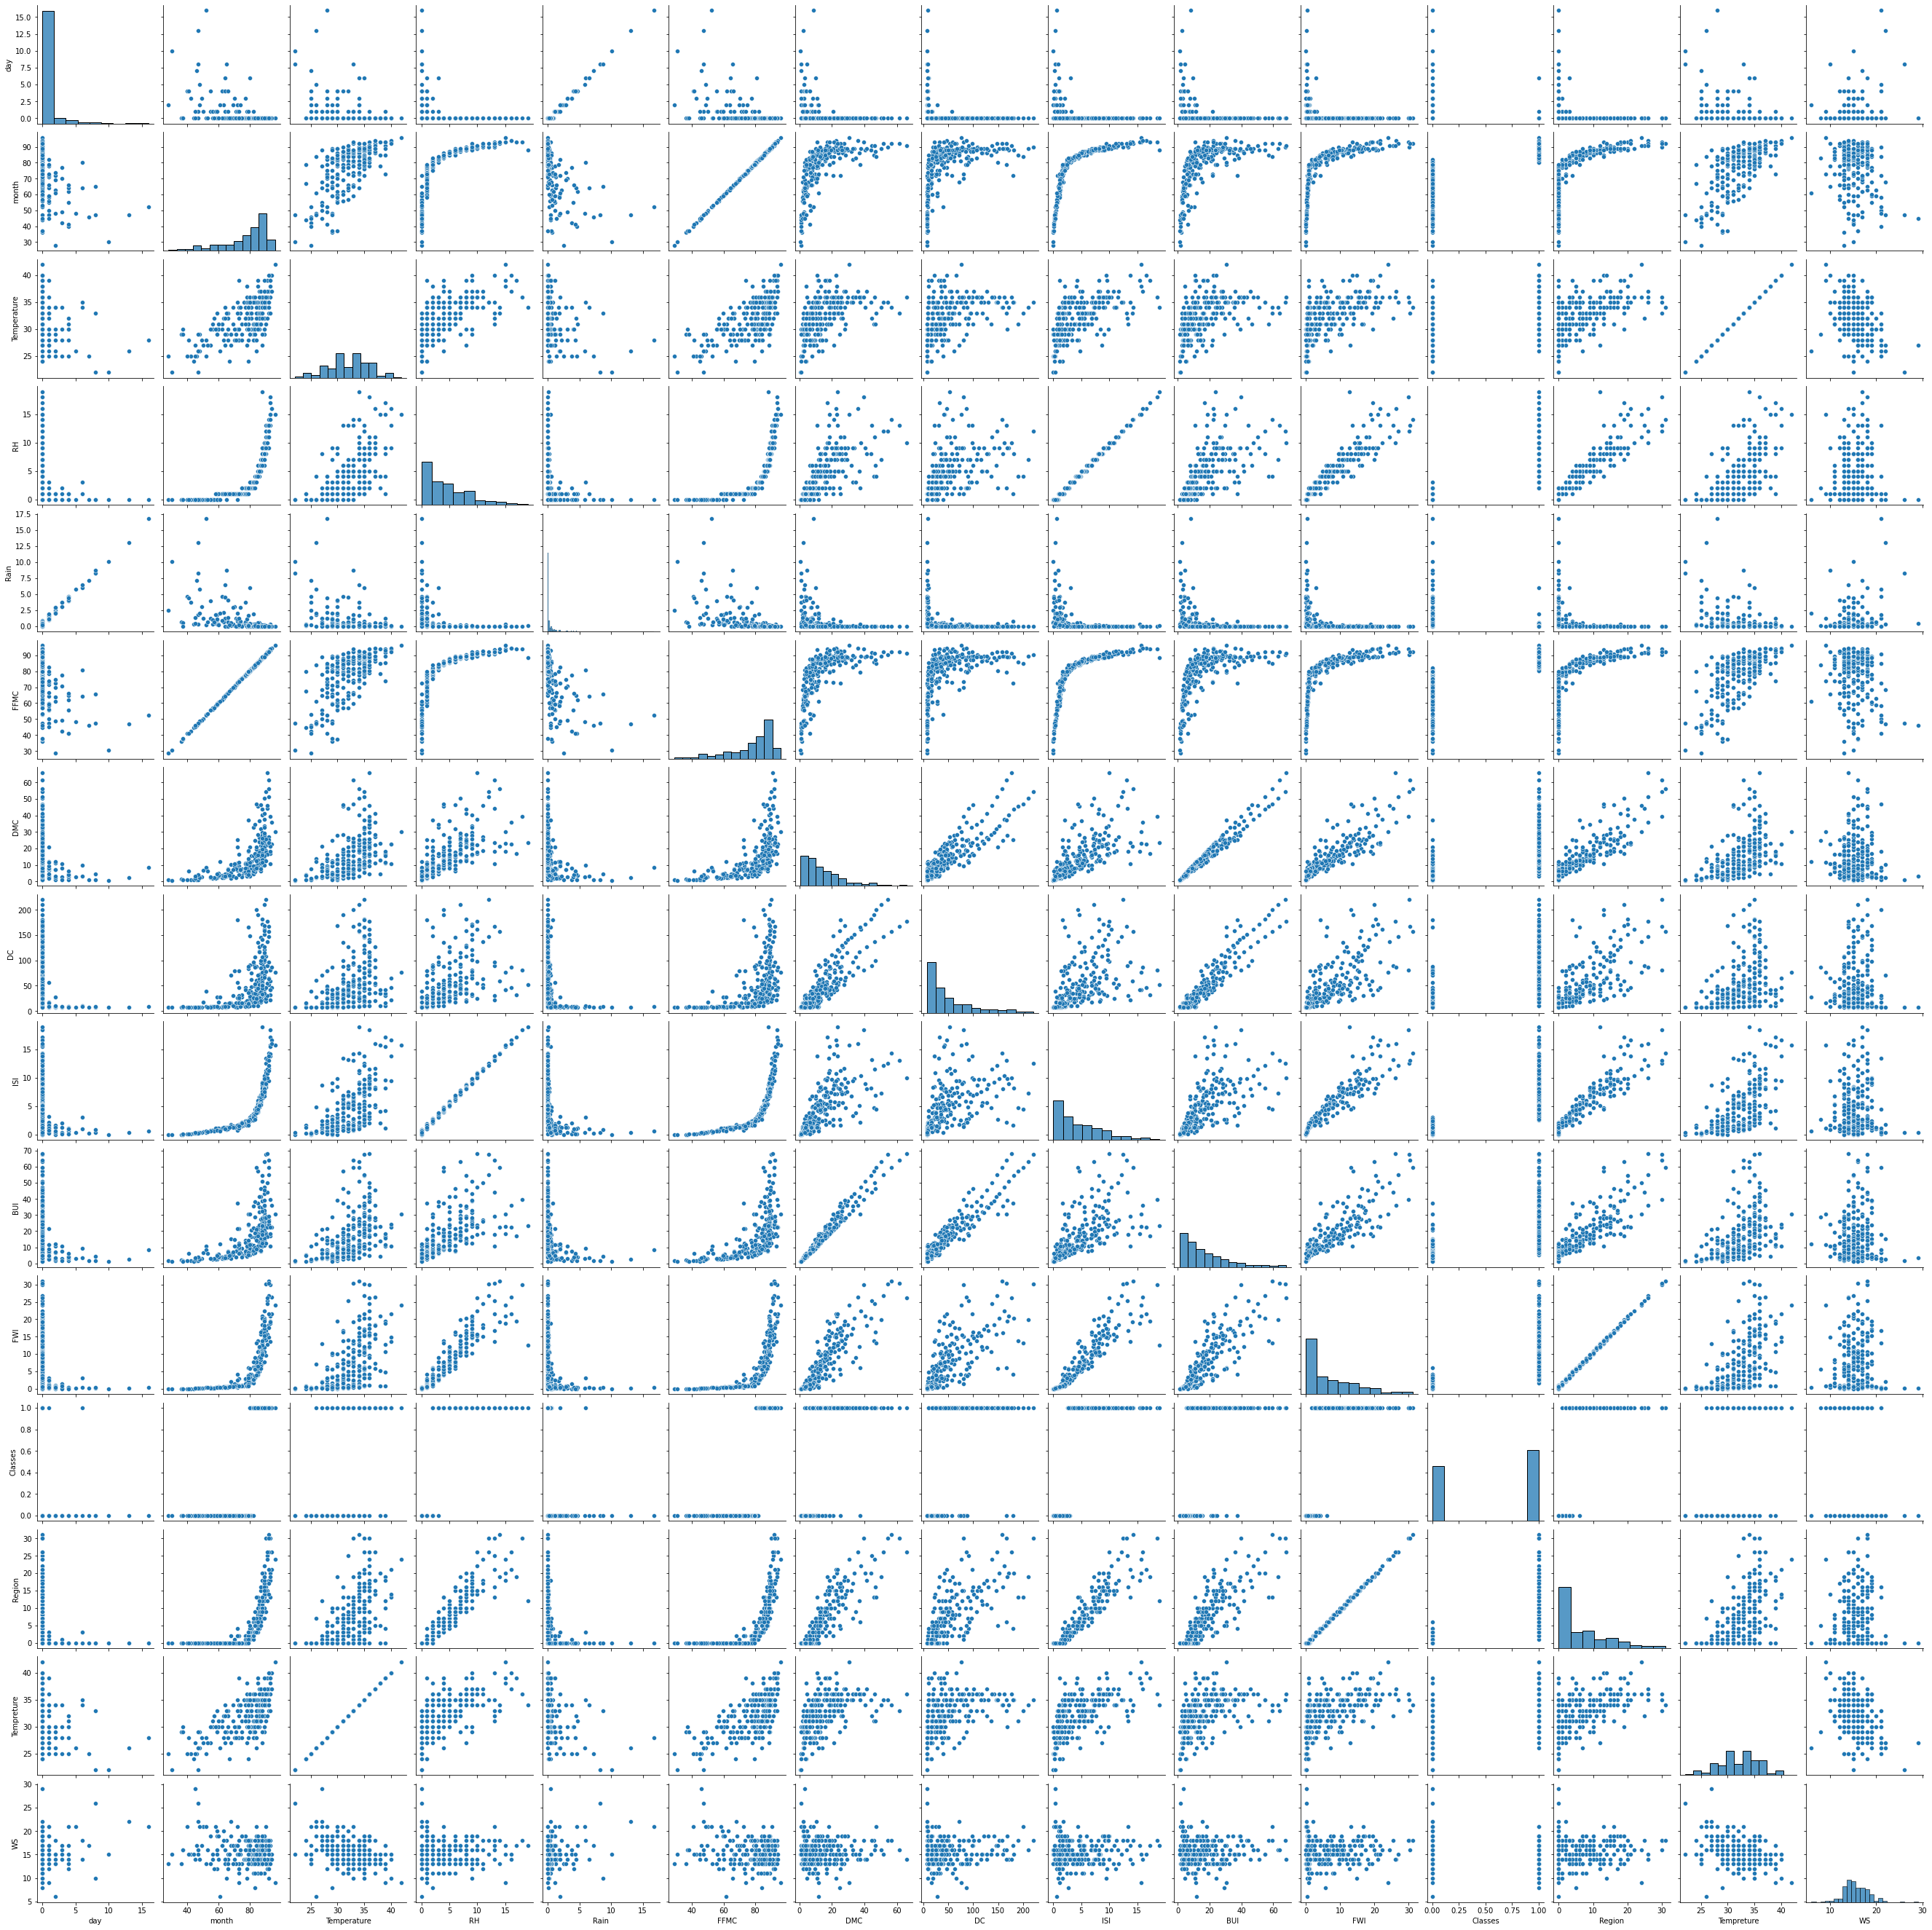

In [42]:
sns.pairplot(data1)

<AxesSubplot:>

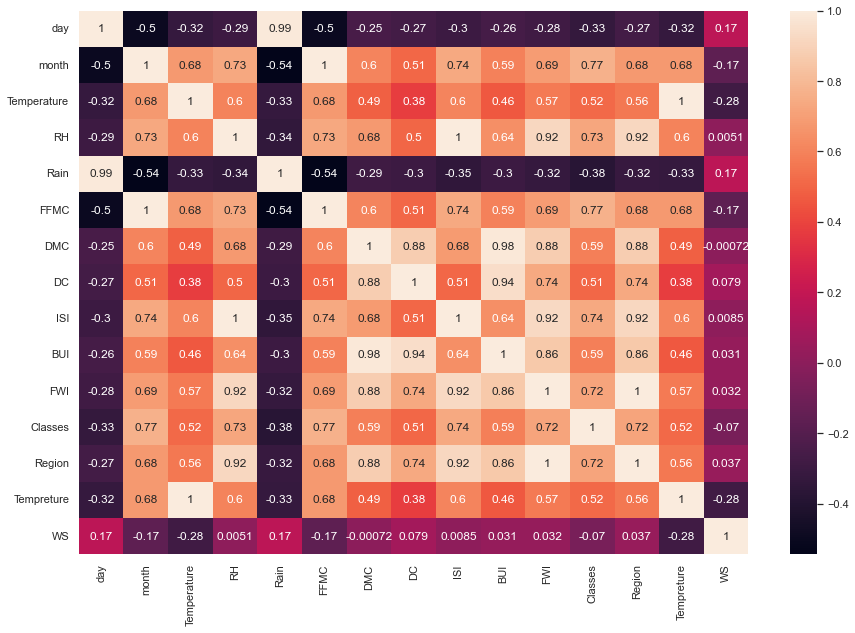

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data1.corr(),annot=True)

In [44]:
data1.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'Tempreture', 'WS'],
      dtype='object')

Text(0, 0.5, 'Temperature')

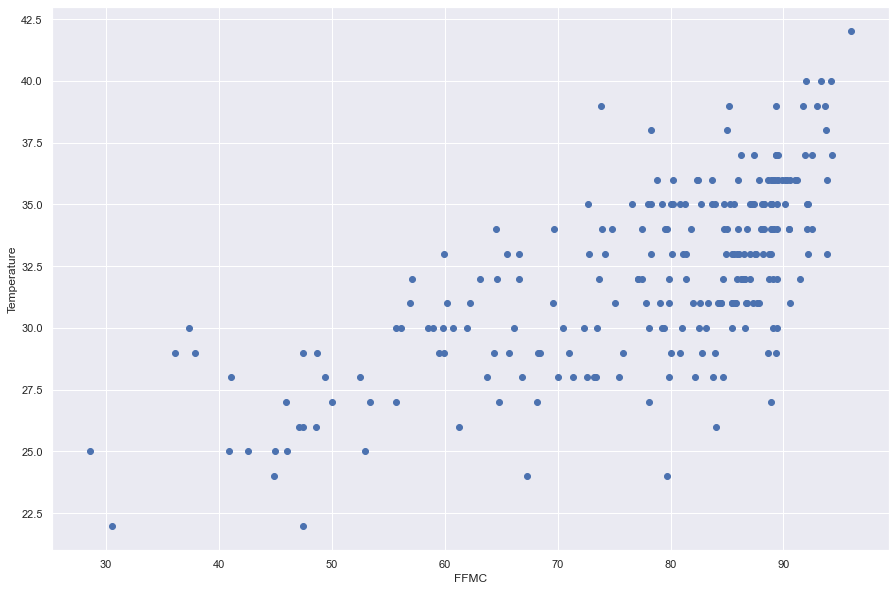

In [45]:
plt.scatter(data1['FFMC'],data1['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

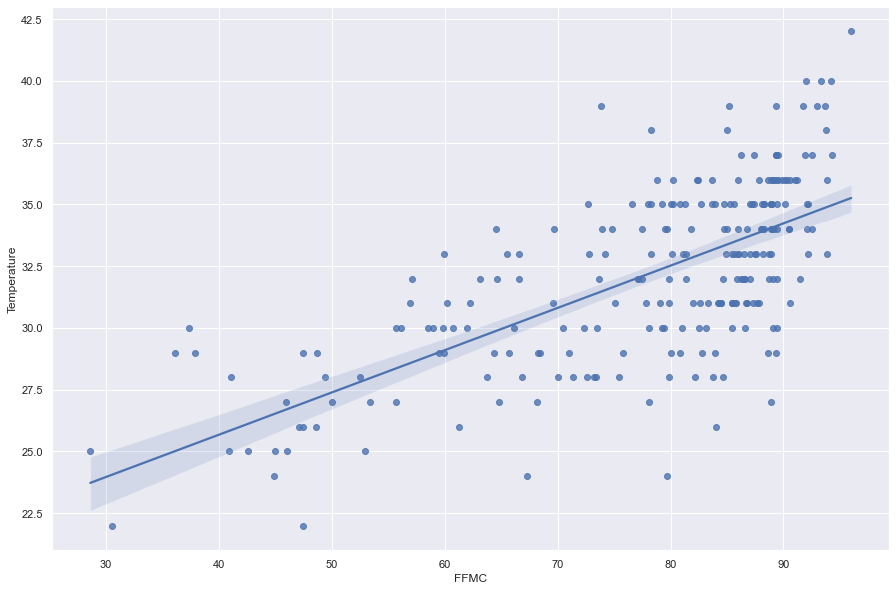

In [47]:
sns.regplot(x='FFMC',y='Temperature',data=data1)

Text(0, 0.5, 'Temperature')

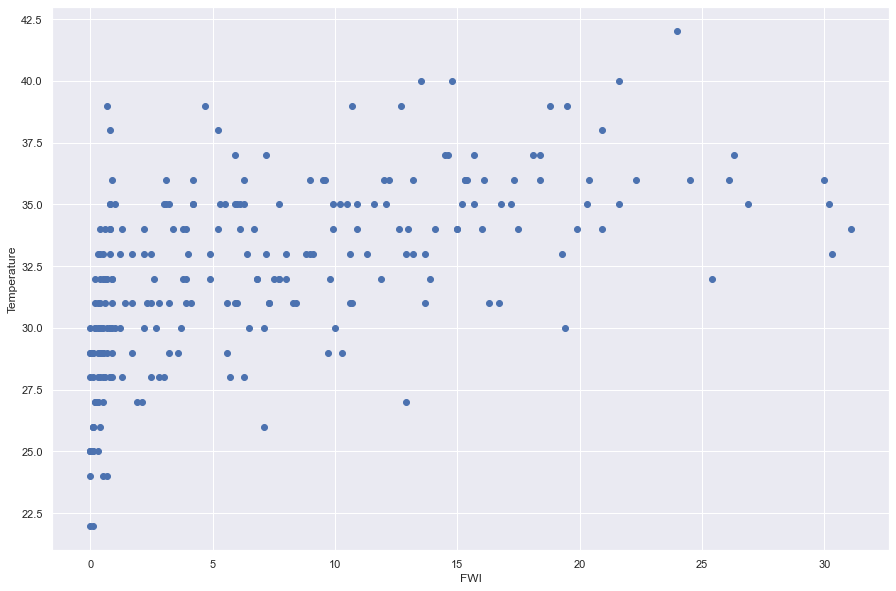

In [48]:
plt.scatter(data1['FWI'],data1['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

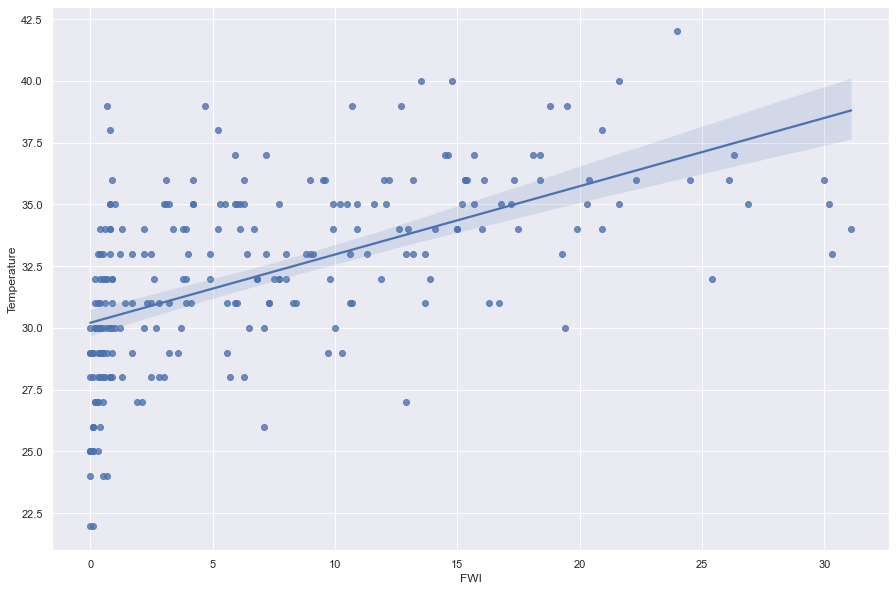

In [49]:
sns.regplot(x='FWI',y='Temperature',data=data1)

Text(0, 0.5, 'Temperature')

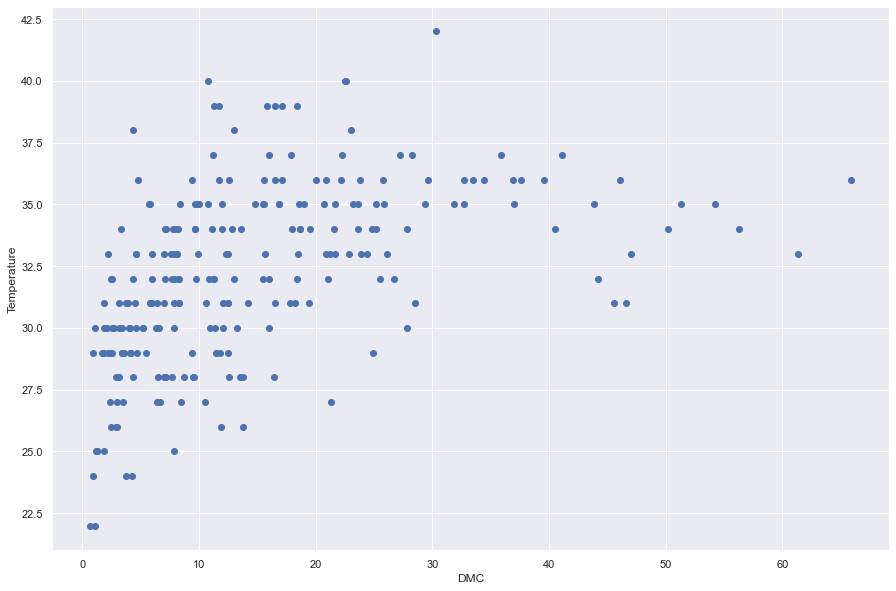

In [50]:
plt.scatter(data1['DMC'],data1['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

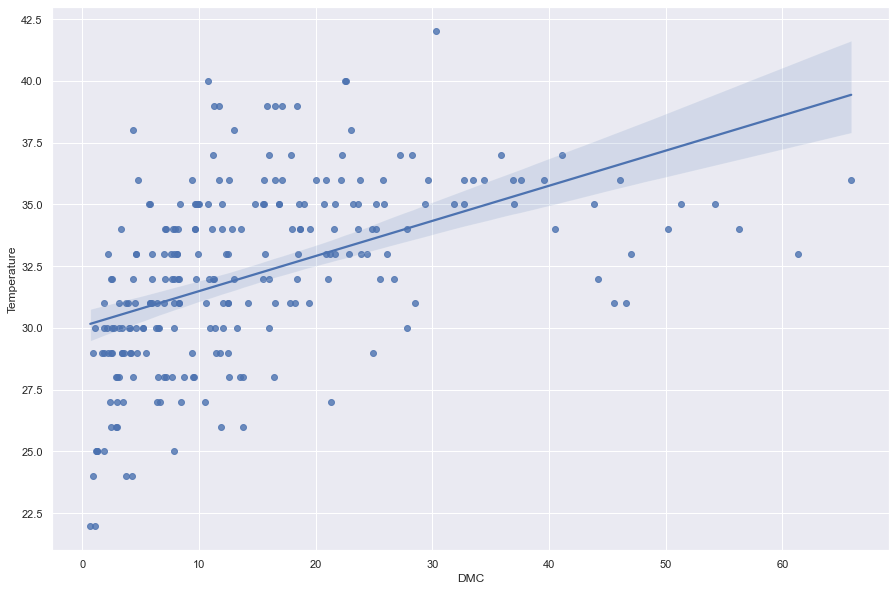

In [51]:
sns.regplot(x='DMC',y ='Temperature',data=data1)

<AxesSubplot:xlabel='Temperature'>

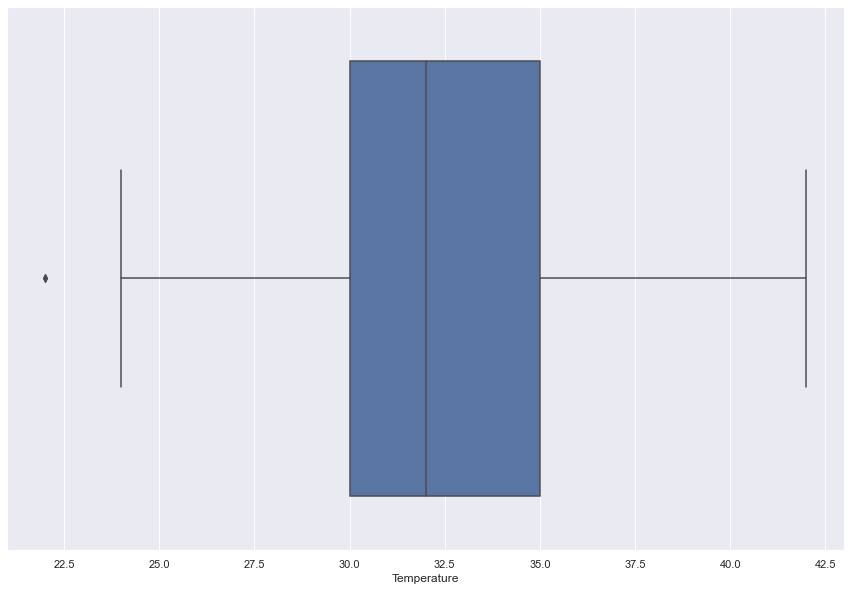

In [52]:
sns.boxplot(data1['Temperature'])